<h1 align = 'center'>VGG16 and KNN<h1>
<h1 align = 'center'>Đỗ Trọng Khánh - 19521676<h1>

#Import Libary

In [46]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img
import cv2
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier

#Connect Driver

In [47]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [48]:
data = '/gdrive/MyDrive/Colab Notebooks/Lập trình Python cho Máy học/Week 12/Data'

# Data Preparation

In [49]:
img_size = (224, 224)
dataset = tf.keras.utils.image_dataset_from_directory(data, image_size=img_size)

Found 20 files belonging to 4 classes.


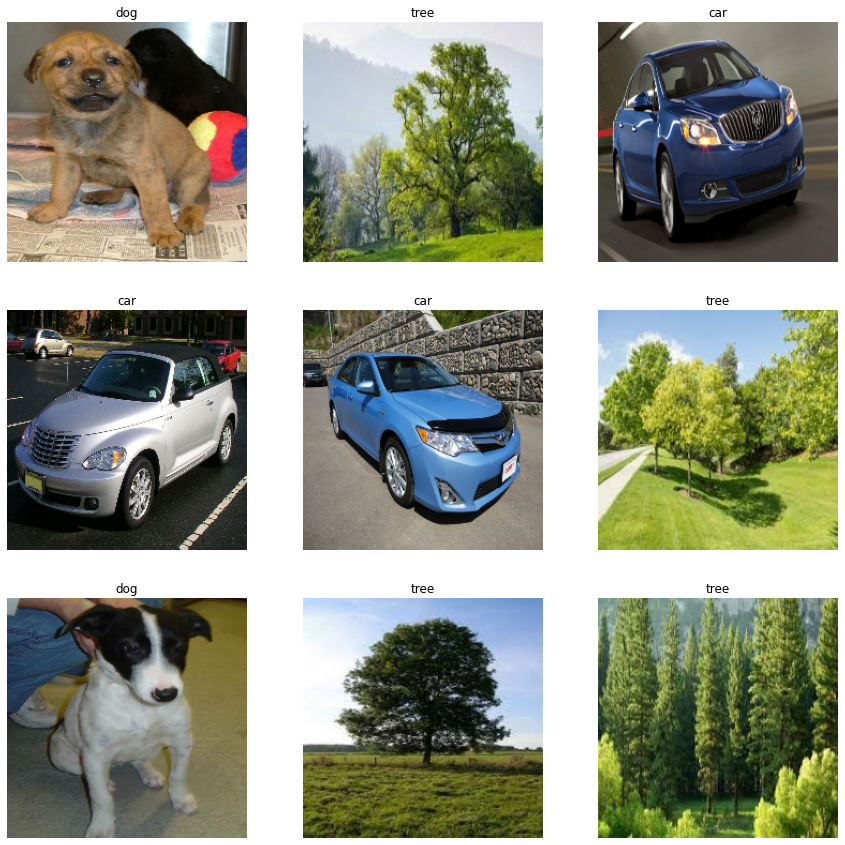

In [50]:
class_names = dataset.class_names

plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Use VGG16 as Feature Extractor

In [51]:
vgg16 = tf.keras.applications.VGG16(include_top=True)

base_model = tf.keras.Sequential()
for layer in vgg16.layers[: -2]:
  base_model.add(layer)

for img, lb in dataset.take(1):
    print(img.shape)

features = base_model(img).numpy()
lb = np.array(lb)

(20, 224, 224, 3)


In [52]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(features, lb)

KNeighborsClassifier(n_neighbors=4)

In [53]:
knn.score(features, lb)

0.75

# Đọc ảnh truy vấn và lấy đặc trưng để tìm top 3 gần nhất

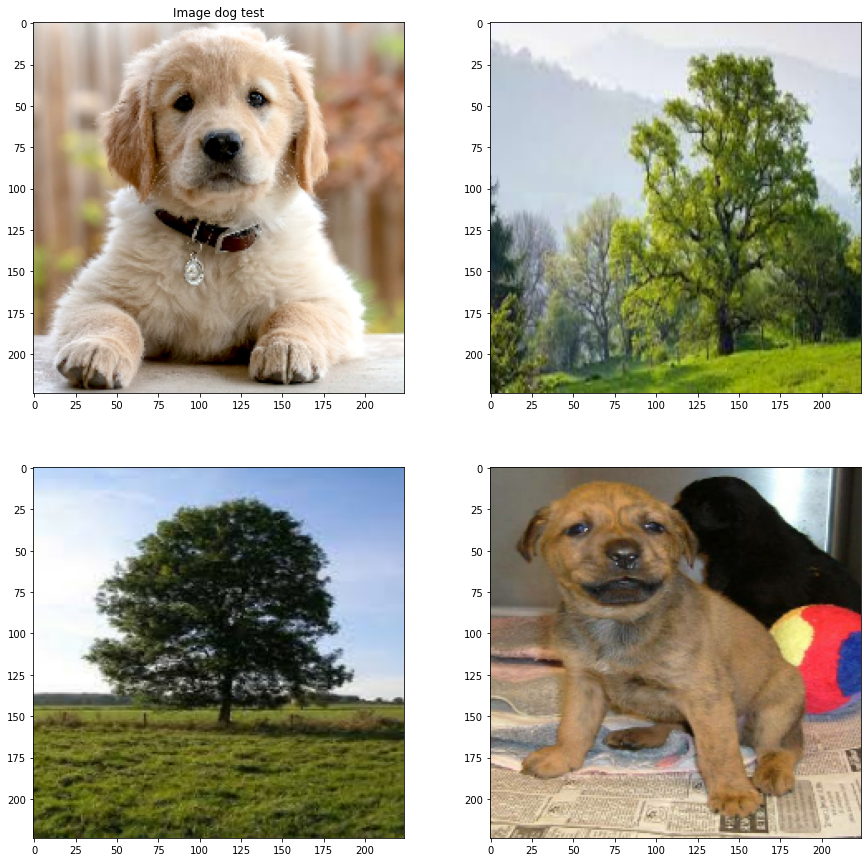

In [58]:
test = cv2.imread('/gdrive/MyDrive/Colab Notebooks/Lập trình Python cho Máy học/Week 12/dog_test.jpeg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test = cv2.resize(test, img_size)

test_ts = tf.convert_to_tensor(test)
test_ts = tf.expand_dims(test, axis=0)

feature = base_model(test_ts)
feature = np.array(feature)

dis, nei = knn.kneighbors(feature, n_neighbors=3)
nei = nei.squeeze()

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].imshow(test.astype('uint8'))
ax[0][0].set_title("Image dog test")

ax[0][1].imshow(img[nei[0]].numpy().astype('uint8'))
ax[1][0].imshow(img[nei[1]].numpy().astype('uint8'))
ax[1][1].imshow(img[nei[2]].numpy().astype('uint8'))
plt.show()